In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import os
import sys
import json
import time
from datetime import datetime
import numpy as np
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from collections import OrderedDict
import pandas as pd
%matplotlib inline


In [4]:
sys.path.insert(0, "../optimizer/")
import single_node_profiles_cpp as snp

In [5]:
results = snp.load_results(os.path.abspath(
    "../debugging/varied-bandwidth-inception-SMP-gpu-3-remote/"))

In [6]:
results.keys()

dict_keys(['varied-bw-v100-remote-inception-batch-16-bw-0.1-180417_065409.json', 'varied-bw-v100-remote-inception-batch-16-bw-100-180417_070224.json', 'varied-bw-v100-remote-inception-batch-16-bw-1000-180417_071920.json', 'varied-bw-v100-remote-inception-batch-16-bw-500-180417_071100.json', 'varied-bw-v100-remote-inception-batch-16-bw-2000-180417_072835.json', 'varied-bw-v100-remote-inception-batch-16-bw-3000-180417_073705.json', 'varied-bw-v100-remote-inception-batch-16-bw-8000-180417_075401.json', 'varied-bw-v100-remote-inception-batch-16-bw-5000-180417_074516.json'])

In [7]:
results['varied-bw-v100-remote-inception-batch-16-bw-0.1-180417_065409.json']["throughput_results"].keys()

dict_keys(['lineage', 'client_metrics', 'summary_metrics', 'clipper_metrics', 'background_bandwidth'])

In [19]:
profs = []
for fname, r in results.items():
    throughput = snp.get_mean_throughput(r, "throughput_results")
    lats = snp.extract_all_latencies(r)
    p99_lat = np.percentile(lats, 99)
    mean_lat = np.mean(lats)
    bw_Mbps = r["throughput_results"]["background_bandwidth"]
    profs.append({"bw_Mbps": bw_Mbps, "thru": throughput[0],
                  "p99_lat": p99_lat, "mean_lat" :mean_lat})

df = pd.DataFrame(profs)
df = df.sort_values("bw_Mbps")

In [15]:
df = pd.DataFrame(profs)

In [16]:
df = df.sort_values("bw_Mbps")

In [20]:
df

,bw_Mbps,mean_lat,p99_lat,thru
0,0.1,0.091502,0.103900,174.9
1,100.0,0.097423,0.108518,232.3
3,500.0,0.093952,0.109361,233.1
2,1000.0,0.102301,0.113386,231.3
4,2000.0,0.097859,0.112312,235.9
5,3000.0,0.101808,0.117542,237.5
7,5000.0,0.101819,0.121210,237.5
6,8000.0,0.100849,0.113023,230.8


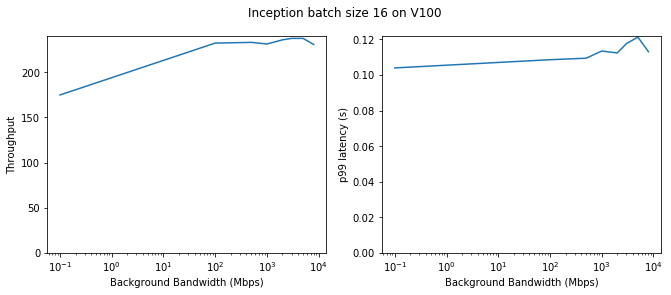

In [28]:
fig, (ax_through, ax_lat) = plt.subplots(ncols=2, figsize=(11, 4))
ax_through.plot(df.bw_Mbps, df.thru)
ax_through.set_ylabel("Throughput")
ax_through.set_xlabel("Background Bandwidth (Mbps)")
ax_through.set_xscale("log")
ax_through.set_ylim(bottom=0)
ax_lat.plot(df.bw_Mbps, df.p99_lat)
ax_lat.set_ylabel("p99 latency (s)")
ax_lat.set_xlabel("Background Bandwidth (Mbps)")
ax_lat.set_xscale("log")
ax_lat.set_ylim(bottom=0)
fig.suptitle("Inception batch size 16 on V100")
plt.savefig("background_bandwidth_vs_profile_inception.png")
plt.show()